# Задание 

In [1]:
import matplotlib.pyplot as plt
import sympy 
import numpy as np

## Task 1
1. Установи библиотеку sympy.
2. Используя ее функции, напиши свою функцию, которая на вход примет математическую функцию $ y=f(x)$ вида $x^2 - x + 21$, и вернёт производную: $2𝑥−1$.

In [2]:
def _diff(f):
    return f.diff('x')
x = sympy.Symbol('x')
_diff(x ** 2 - x + 21)


2*x - 1

## Task 2
В этот раз напиши свою функцию, которая на вход примет математическую функцию $p = f(x, y)$, зависящую от двух переменных вида $ (x-y)^2 $, а также ту переменную, по которой нужно посчитать частную производную. Функция должна вернуть частную производную этой переменной: $2𝑥−2𝑦$.

In [3]:
def _diff2(f, char):
    return f.diff(char)
x = sympy.Symbol('x')
y = sympy.Symbol('y') 
_diff2((x-y)**2, x)  

2*x - 2*y

## Task 3

1. Тебе надо написать математическую функцию. Представь, что у тебя есть y_true и есть y_pred (предсказанное). Тебе надо посчитать квадрат отклонения одного от другого. Причём предсказанное значение получается при помощи функции линейной регрессии: y = wx +b. Дополнительно поделим всё это на n.
2. Нужно написать функцию Python, которая примет на вход эту функцию и ту переменную, по которой нам надо посчитать частные производные. Нас будут интересовать w и b. Именно их наилучшие значения мы и будем в дальнейшем искать. Функция должна вернуть производные сразу по обеим этим переменным.

In [18]:
def diff_(f, w, b):
    return (f.diff(w), f.diff(b))
w = sympy.Symbol('w')
b = sympy.Symbol('b')

diff_((((y_true - ({ w * x + b}))**2)/n), w, b)

## Task 4
1. В этот раз вам надо написать класс `Gradient()`, который будет состоять из нескольких методов. Объект при инициализации получает два вектора: `X`, `Y`. Далее методы обращаются к ним уже внутри класса.
    - `predict`: на вход она получает `w`, `b`, на выход она выдаёт прогнозные значения `Y_pred`;
    - `mse`: на вход она получает `Y_pred`, на выход выдает посчитанное MSE;
    - `update`: на вход она получает `Y_pred`, `w`, `b`; на выход выдаёт новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам.
2. Проверить работу методов, подав на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в требуемые методы.

In [4]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

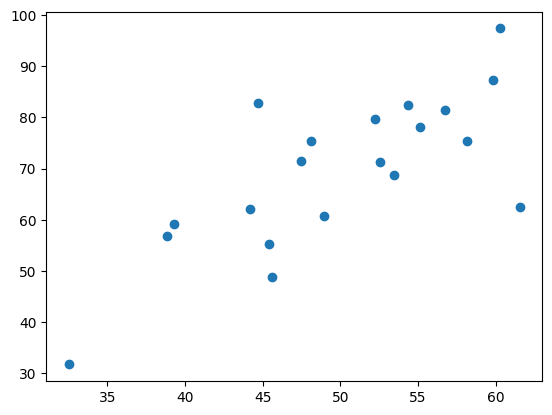

In [5]:
plt.scatter(X, Y);

In [6]:
class Gradient:

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, w, b):  
        Y_pred = []
        for i in self.X:
            Y_pred.append(w * i + b)
        return Y_pred
    
    def mse(self, Y_pred):
        MSE = np.mean((self.Y - Y_pred)**2)
        return MSE

    def update(self, Y_pred, w, b):
        a = 0.0001
        w_n = w - a * np.mean(-2 * (self.Y - Y_pred) * self.X)
        b_n= b * a * np.mean(-2 * (self.Y - Y_pred))
        return w_n, b_n


G = Gradient(X, Y)

Y_pred = G.predict(1, 2)
MSE = G.mse(Y_pred)
w_n, b_n = G.update(Y_pred, 1, 2)
Y_pred_n = G.predict(w_n, b_n)
MSE_n = G.mse(Y_pred_n)
print(MSE,MSE_n)

414.23942315166204 212.43017850541628


## Task 5
Улучши код таким образом, чтобы появился метод `optimize`. Он должен итеративным образом пройти какое-то количество раз обновление значений `w`, `b`, придя к оптимальному значению. Критерии останова:
 - если было превышено количество заранее заданных итераций `num_iterations`;
 - если новая итерация выдала разницу между текущей ошибкой и ошибкой прошлой итерации значение, меньшее, чем `stopping_threshold`;
 - метод должен вернуть финальные значения `w`, `b`, и `mse`.


In [15]:
class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, w, b):  
        Y_pred = []
        for i in self.X:
            Y_pred.append(w * i + b)
        return Y_pred
    
    def mse(self, Y_pred):
        MSE = np.mean((self.Y - Y_pred)**2)
        return MSE

    def update(self, Y_pred, w, b):
        a = 0.0001
        w_n = w - a * np.mean(-2 * (self.Y - Y_pred) * self.X)
        b_n= b * a * np.mean(-2 * (self.Y - Y_pred))
        return w_n, b_n
        
    def optimize(self, w, b, iteration):
        w_n = 0
        b_n = 0
        Y_pred = G.predict(w, b)
        MSE = G.mse(Y_pred)
        stopping_threshold = MSE * MSE
        i = 0
        while (stopping_threshold > MSE and i < iteration):
            i = i + 1
            w_n, b_n = G.update(Y_pred, w, b)
            Y_pred = G.predict(w_n, b_n)
            stopping_threshold = G.mse(Y_pred)
            print(i, stopping_threshold)
        return w_n, b_n, stopping_threshold

G_D = GradientDescent(X, Y)
w = 2
b = 3
Y_pred = G.predict(w, b)
MSE = G.mse(Y_pred)
print(MSE)
G_D.optimize(w, b, 1)

1239.984273957811
1 282.81761740855256


(1.658524232614304, 0.020095300032300003, 282.81761740855256)